# Prepare your own data
While the SDV offers many publicly available demo datasets, you may want to use one of your own, private datasets for synthetic data creation.

In this notebook, we'll cover the basics of how you can prepare your data for the SDV. This includes loading your data and writing a metadata description of the tables.

_Last Edit: Apr 15, 2025 (using SDV version 1.20.0)_

# 0. Installation

Install SDV Community.

In [ ]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

# 1. Loading your data

## 1.1 Uploading files into Google Colab
Let's first upload all files into the Google Colab notebook. Click The "Choose Files" button to open up a file picker. Then, chose all the files that contain the data.

*It's easiest to start with a set of CSV files, where each file represents a data table with rows and columns.*

In [ ]:
from google.colab import files

# Optional: You can skip this step if you are running the code on your own machine
uploaded = files.upload()

Saving hotels.csv to hotels.csv
Saving guests.csv to guests.csv


After this step, all the files should be available in a folder called `/content/`. Now we can use the built-in SDV functions to read in the data into Python.

## 1.2 Loading the data into Python
Now that the files are attached to the notebook, we'll need to load them into Python so that we can use them.

If your files are present in a CSV format, you can use the built-in `CSVHandler` to load them into Python, as shown below.

In [ ]:
import pandas as pd
import io

# Assuming your uploaded file is named 'your_file_name.csv'
# Replace 'your_file_name.csv' with the actual name of your uploaded file
#df = pd.read_csv(io.BytesIO(uploaded['your_file_name.csv']))

In [ ]:
from sdv.io.local import CSVHandler

connector = CSVHandler()

# This is the default folder name that Google Colab uses
# Change this if you have your own folder with CSV files
FOLDER_NAME = '/content/'

data = connector.read(folder_name=FOLDER_NAME)

If your data is present in other filetypes, you can load it into Python using different methods.

If you are using the publicly available SDV software, there is a built-in functionality to load data from [an Excel spreadsheet](https://docs.sdv.dev/sdv/multi-table-data/data-preparation/loading-data/excel). You can also use any of the functions available in the [open source Pandas library](https://docs.sdv.dev/sdv/multi-table-data/data-preparation/loading-data#do-you-have-data-in-other-formats) to load in your data.

_SDV Enterprise customers can [directly connect to their database](https://docs.sdv.dev/sdv/multi-table-data/data-preparation/loading-data#connect-to-a-database) and import data from there._

### What if I don't have data?

If you do not have data that is ready-to-go, you can use one of SDV's demo dataset for the rest of this notebook.

However, we strongly recommend testing it out again with your own data, whenever you get access to it.

In [ ]:
from sdv.datasets.demo import download_demo

data, _ = download_demo(
  modality='multi_table',
  dataset_name='fake_hotels'
)

## 1.3 Inspecting your data

Once your data is in Python, it should be available as a dictionary. Inside this dictionary, you should have the name of every table (string) mapped to a pandas DataFrame object of the data that it contains.

Here are the keys of `data` dictionary:

In [ ]:
data.keys()

dict_keys(['hotels', 'guests'])

You can inspect the pandas DataFrame by accessing the key name of the table.

In [ ]:
hotels_table = data['hotels']

# use the head method to inspect the first few rows of the data
hotels_table.head(3)

,hotel_id,city,state,rating,classification
0,HID_000,Boston,Massachusetts,4.8,RESORT
1,HID_001,Boston,Massachuesetts,4.1,CHAIN
2,HID_002,San Francisco,California,3.8,MOTEL


In [ ]:
guests_table = data['guests']

guests_table.head(3)

,guest_email,hotel_id,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,awolf@phillips.com,HID_000,False,BASIC,37.89,27 Dec 2020,28 Dec 2020,156.23,"993 Rebecca Landing\nJesseburgh, PA 05072",4075084747483975747
1,tonya44@wilkinson-wilkins.com,HID_000,False,BASIC,24.37,30 Dec 2020,31 Dec 2020,139.43,"958 Beverly Bypass\nSouth Ronald, GA 46368",180072822063468
2,harriskathleen@goodwin.com,HID_000,True,DELUXE,0.00,17 Sep 2020,19 Sep 2020,403.33,"8302 Nathaniel Pike\nRileyland, TX 71613",38983476971380


# 2. Writing a Metadata Description
The SDV requires that you provide a description of your data, also known as **metadata**.

The metadata describes the types of data that are available in every column. If you have multiple tables, it also describes how those tables are connected.

## 2.1 Auto Detecting Metadata
The easiest way to create our metadata object is by auto-detecting it from our data.

<font color="red"><b>Warning: The detected metadata is not guaranteed to be accurate or complete.</b> We'll update it later to correct it.</font>

In [ ]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframes(data)

We can inspect the auto detected metadata:

Auto detected data:



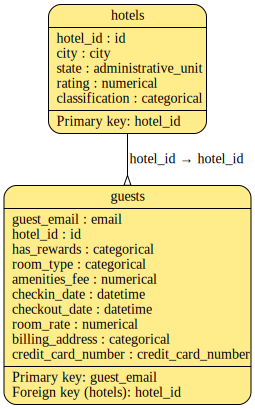

In [ ]:
print('Auto detected data:\n')
metadata.visualize()

The metadata auto-detected the connection between the `hotels` and `guests` table. Each column is associated with an **sdtype**, which describes the type of data.

Notice that the sdtypes vary:
- Statistical sdtypes such as `categorical`, `datetime` and `numerical` provide more general information about the type of data
- Semantic sdtypes such as `credit_card_number` and `city` provide higher level information that is understandable to humans

For more information, see the [sdtypes docs page](https://docs.sdv.dev/sdv/reference/metadata-spec/sdtypes).

<font color="red"><b>The auto-detected metadata is not guaranteed to be accurate or complete</b></font> so it's important to visualize and update any columns that are incorrect.

## 2.2 Updating metadata
Let's start by adding more information to the metadata that may not be auto-detected. Let's supply a regex format the `hotel_id` column in both tables.

We can use the [`update_column` function](https://docs.sdv.dev/sdv/reference/metadata-spec/metadata-api#update_column) to modify the columns.

In [ ]:
metadata.update_column(
    table_name='hotels',
    column_name='hotel_id',
    sdtype='id',
    regex_format='HID_[0-9]{3,5}'
)

metadata.update_column(
    table_name='guests',
    column_name='hotel_id',
    sdtype='id',
    regex_format='HID_[0-9]{3,5}'
)

We can also use this method to change an sdtype. For example, the `billing_address` column is detected as `categorical`, which is not accurate; this column does not represent any preset categories but rather a higher-level, semantic concept.

So let's update the sdtype to be `address`, which represents the full address of a physical location. (See [the docs](https://docs.sdv.dev/sdv/reference/metadata-spec/sdtypes#additional-sdtypes-domain-specific-concepts-and-pii) for more possibilities.)

In [ ]:
metadata.update_column(
    table_name='guests',
    column_name='billing_address',
    sdtype='address',
    pii=True
)

## 2.3 Validation
Now, the metadata should be accurate. Let's validate that the metadata format makes sense. If successful, the code below should run without any errors.

In [ ]:
metadata.validate()

We can also validate that the metadata accurately matches the data that we provided. Similar to before, the code below should run without any errors.

In [ ]:
metadata.validate_data(data=data)

Finally, we can also visualize the final structure data to verify that the columns and connections are ok.

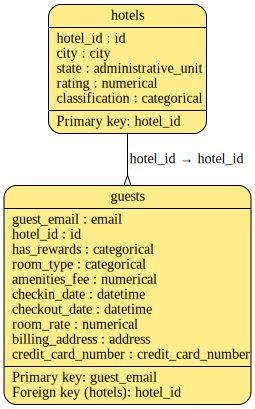

In [ ]:
metadata.visualize()

## 2.4 Saving the Metadata
We **highly recommend saving the metadata** as a `JSON` object so we can re-use this description whenever we need to.

In [ ]:
metadata.save_to_json('metadata.json')

# in the future, you can reload the metadata object from the file
metadata = Metadata.load_from_json('metadata.json')

# 3. Creating Synthetic Data
With these preparatory steps completed, we can now use the metadata description and data in the SDV. The coe below will train a model and create synthetic data.

In [ ]:
from sdv.multi_table import HMASynthesizer

synthesizer = HMASynthesizer(metadata)
synthesizer.fit(data)
synthetic_data = synthesizer.sample(scale=1)

Preprocess Tables: 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]



Learning relationships:


(1/1) Tables 'hotels' and 'guests' ('hotel_id'): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


Modeling Tables: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


The synthetic data contains the same tables, columns and connections as the real data.

In [ ]:
synthetic_data['hotels'].head(3)

,hotel_id,city,state,rating,classification
0,HID_004,Samanthachester,Pennsylvania,4.5,MOTEL
1,HID_000,South Nicolefort,Arkansas,4.5,MOTEL
2,HID_005,Port Danielport,Ohio,4.1,MOTEL


In [ ]:
synthetic_data['guests'].head(3)

,guest_email,hotel_id,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,moodyeric@example.net,HID_004,True,BASIC,22.00,01 Mar 2020,13 Feb 2020,96.92,"PSC 4273, Box 0888\nAPO AA 28423",5161033759518983
1,coryguzman@example.com,HID_004,True,BASIC,25.68,21 Aug 2020,08 Jun 2020,77.86,"417 Lawrence Hollow\nEast Ericshire, IN 65660",4133047413145475690
2,caitlinlee@example.net,HID_004,False,BASIC,36.92,14 Apr 2020,22 Apr 2020,89.94,"69754 Mcguire Haven Apt. 260\nCrawfordside, IN...",4977328103788


# 4. What's Next?

Visit the **[metadata documentation](https://docs.sdv.dev/sdv/reference/metadata-spec)** for more information.

You may also be interested in our tutorials for **[synthesizing a table](https://colab.research.google.com/drive/1XCwu7NaCYXf3kkhlx4Iei4w2KrXzr1zo)** or **[synthesizing multi tables](https://colab.research.google.com/drive/1h_xwzHXrif-xEOC39amYC6xfNPu5hDA1)**.

**Need more help?** [Browse all tutorials](https://docs.sdv.dev/sdv/demos).

---

# About

The [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV) was first created at MIT's Data to AI Lab in 2016. After 4 years of research and traction with enterprise, we created [DataCebo](https://datacebo.com/) in 2020 with the goal of growing the project. Today, DataCebo is the proud developer of SDV, the largest ecosystem for tabular synthetic data generation & evaluation.

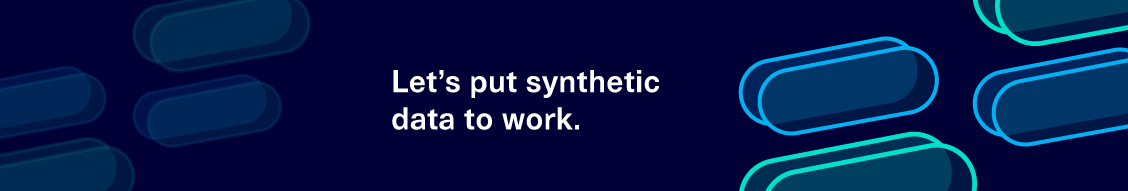